<a href="https://colab.research.google.com/github/KhanSahaab1/DataScience/blob/main/intern_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this Excercise we are working on a Clustering Algorithm called K-Means
## we use Iris data to make cluster of its few feature

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
iris=pd.read_csv('iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris.shape

(150, 5)

#### checking Null Values

In [ ]:
iris.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

<AxesSubplot:title={'center':'sepal length VS sepal width'}, xlabel='sepal.length', ylabel='sepal.width'>

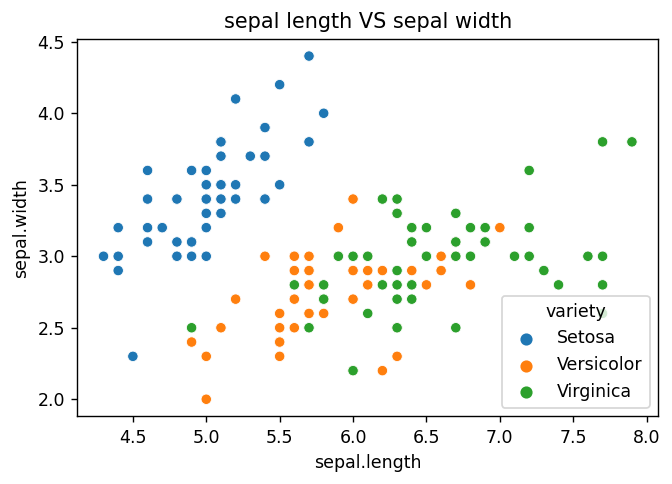

In [ ]:
plt.figure(dpi=125)
plt.title('sepal length VS sepal width')
sns.scatterplot(x="sepal.length",y='sepal.width',data=iris,hue='variety')

## Plotting the data to visulize any information about clusters

<AxesSubplot:title={'center':'petal length VS petal width'}, xlabel='petal.length', ylabel='petal.width'>

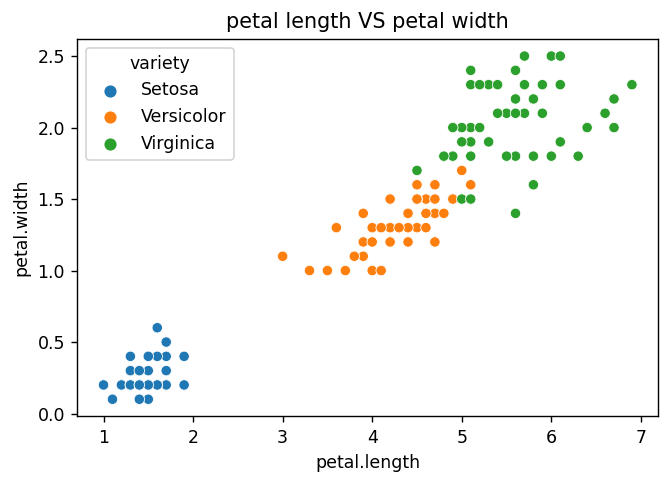

In [ ]:
plt.figure(dpi=125)
plt.title('petal length VS petal width')
sns.scatterplot(x="petal.length",y='petal.width',data=iris,hue='variety')

<AxesSubplot:title={'center':'sepal length VS petal width'}, xlabel='sepal.length', ylabel='petal.width'>

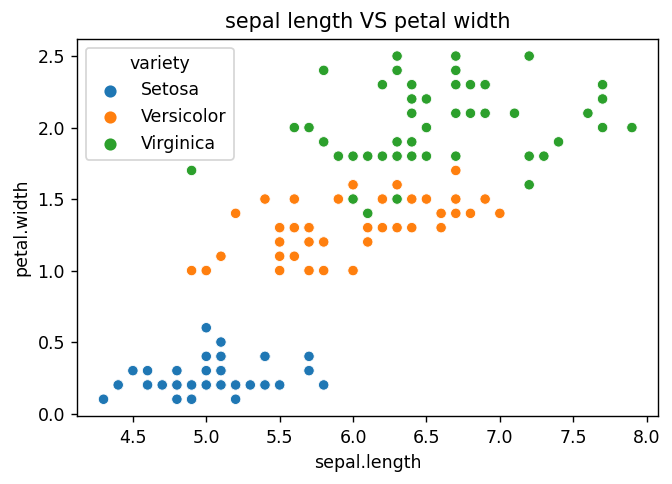

In [ ]:
plt.figure(dpi=125)
plt.title('sepal length VS petal width')
sns.scatterplot(x="sepal.length",y='petal.width',data=iris,hue='variety')

<AxesSubplot:title={'center':'sepal width VS petal length'}, xlabel='sepal.width', ylabel='petal.length'>

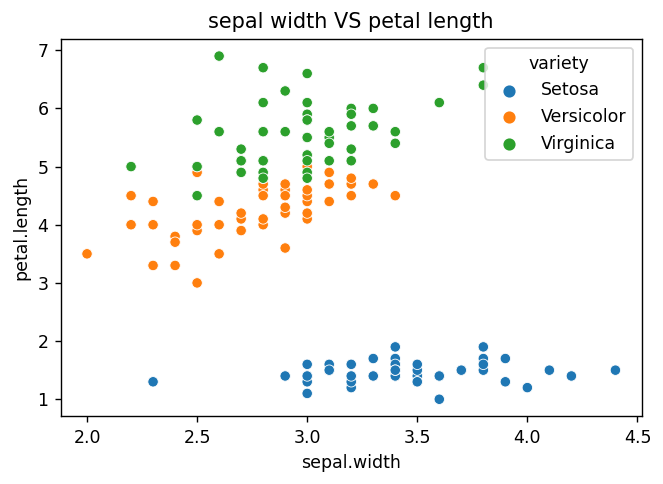

In [ ]:
plt.figure(dpi=125)
plt.title('sepal width VS petal length')
sns.scatterplot(x="sepal.width",y='petal.length',data=iris,hue='variety')

# here we are using PETAL LENGTH & WIDTH to make clusters

In [ ]:
df=iris[["petal.length",'petal.width']]
df

,petal.length,petal.width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

### Drawing elbow to find optimum No. of clusters

## Sum of Squared Error(SSE)

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

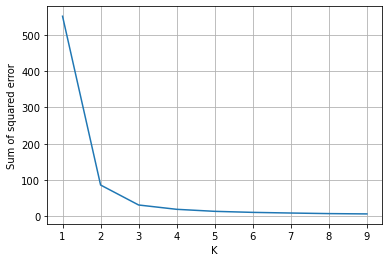

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.grid()

### Elbow is at 3 so we take n_cluster=3 

### now creating the Machine Learning Model by importing required libraries

In [ ]:
km=KMeans(n_clusters=3)

In [ ]:
pred=km.fit_predict(df)

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df['cluster']=pred

In [ ]:
df

,petal.length,petal.width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

# Plotting Clusters and their Centroid

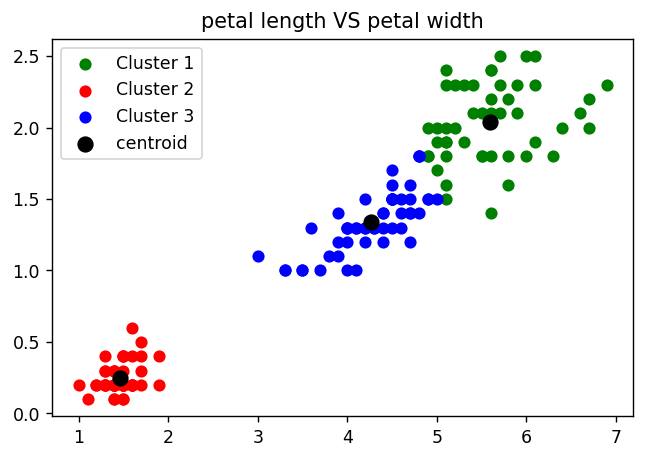

In [ ]:
plt.figure(dpi=125)
plt.title('petal length VS petal width')
plt.scatter(df1["petal.length"],df1["petal.width"],color='green',label="Cluster 1")
plt.scatter(df2["petal.length"],df2["petal.width"],color='red',label="Cluster 2")
plt.scatter(df3["petal.length"],df3["petal.width"],color='blue',label="Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=70,color='black',marker='o',label="centroid")
plt.legend()
plt.show()

In [ ]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

# WE SUCESSFULLY CREATED THE CLUSTER BY USING K-MEANS CLUSTERING ALGORITHM.